# 08 Python 的資料結構和互動

這次我們來討論一些之前沒有討論過的 `array` 進階說明, 還有 `dictionary` 這個新的資料結構。接著就是 Jupyter 非常酷、非常炫的互動功能!

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 07-1 Array

我們先來回憶, 怎麼畫個函數的圖。

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(x)

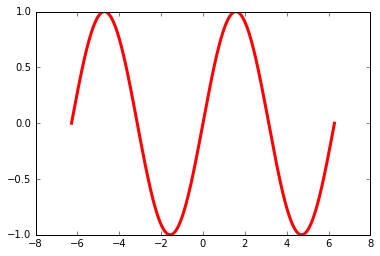

In [4]:
plt.plot(x, y, lw=3, c='r')

#### array 可以條件判斷

In [5]:
s = np.array([-3, 2, 7, -5, 2])

我們來看有哪些大於 0, 這會出現另一個都是 `True`, `False` 的 `array`。

In [6]:
s > 0

array([False,  True,  True, False,  True], dtype=bool)

當然可以放到一個變數 `b` 中, 這樣 `b` 就會是這個 `True` 或 `False` 的 `array`。

In [7]:
b = s > 0

In [8]:
b

array([False,  True,  True, False,  True], dtype=bool)

這時我們就可以用 `b` 當<span style="color:red">過濾器</span>, 把 `True` 的部份找出來。

In [9]:
s[b]

array([2, 7, 2])

事實上瞭解原理之後, 直接這樣做就可以了。

In [10]:
s[s > 0]

array([2, 7, 2])

當然其他的判斷也是可以的。

In [11]:
s[s < 0]

array([-3, -5])

In [12]:
s[s == 0]

array([], dtype=int64)

#### 來個很酷的應用

我們現在來標示某個函數大於 0 的部份。

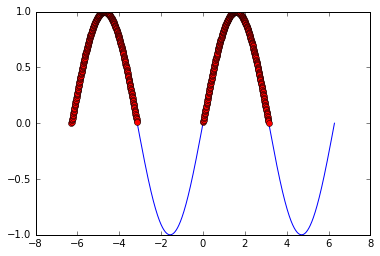

In [13]:
plt.plot(x,y)
plt.plot(x[y>0], y[y>0], 'o', c='r')

## 07-2 矩陣

先來個 28 個數字的 array。

In [14]:
a = np.arange(28)

In [15]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

#### `array` 是有「形狀」的

In [16]:
a.shape

(28,)

我們可以改成, 例如 $7 \times 4$ 這樣的嗎?

In [17]:
a.shape=(7,4)

In [18]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

真的成功了!!

#### 這是矩陣嗎?

我們可能很興奮的想, 這是矩陣嗎? 我們來試試。

In [19]:
A = np.arange(4)
B = np.arange(5,9)

In [20]:
A, B

(array([0, 1, 2, 3]), array([5, 6, 7, 8]))

全換成 $2 \times 2$ 大小!

In [21]:
A.shape=(2,2)
B.shape=(2,2)

In [22]:
A, B

(array([[0, 1],
        [2, 3]]), array([[5, 6],
        [7, 8]]))

In [23]:
A*B

array([[ 0,  6],
       [14, 24]])

是不是, 矩陣... 啊? 不是矩陣乘法!

#### 2 維陣列變矩陣

In [24]:
mA = np.matrix(A)
mB = np.matrix(B)

In [25]:
mA*mB

matrix([[ 7,  8],
        [31, 36]])

真的是矩陣乘法了!

#### 順便來看看其他矩陣功能

轉置

In [26]:
mA

matrix([[0, 1],
        [2, 3]])

In [27]:
mA.T

matrix([[0, 2],
        [1, 3]])

反矩陣

In [28]:
mA.I

matrix([[-1.5,  0.5],
        [ 1. ,  0. ]])

In [29]:
mA * mA.I

matrix([[ 1.,  0.],
        [ 0.,  1.]])

#### 快速生特別的矩陣

單位矩陣

In [30]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

零

In [31]:
Z = np.zeros((3,4))

In [32]:
Z

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

壹

In [33]:
one = np.ones((3,4))

In [34]:
one

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

對角矩陣

In [35]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

也可以用來取出對角數字

In [36]:
A = np.arange(1,10)

In [37]:
A.shape=(3,3)

In [38]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [39]:
np.diag(A)

array([1, 5, 9])

這樣也可以

In [40]:
A.diagonal()

array([1, 5, 9])

然後可以用 A 的對角形成的矩陣。

In [41]:
np.diag(np.diag(A))

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

## 07-3 Dictionary

字典檔是 Python 另一個很常用、很有用的資料結構。我們先看看一個很基本的範例。

In [42]:
mydic = {'apple':'蘋果', 'banana':'香蕉'}

In [43]:
mydic

{'apple': '蘋果', 'banana': '香蕉'}

#### 查字典

In [44]:
mydic['apple']

'蘋果'

#### 加字進去

In [45]:
mydic['orange'] = '橘子'

In [46]:
mydic

{'apple': '蘋果', 'banana': '香蕉', 'orange': '橘子'}

## 07-4 互動

In [47]:
from ipywidgets import interact, interact_manual

In [1]:
x = np.linspace(0, 10, 1000)

def draw(n):    
    y = np.sin(n*x)
    plt.plot(x,y, lw=3)
    plt.show()

NameError: name 'np' is not defined

In [2]:
interact(draw, n=(1, 20))

NameError: name 'interact' is not defined

In [50]:
interact_manual(draw, n=(1,20))

<function __main__.draw>

In [51]:
def 計算BMI(身高,體重):
    身高 = float(身高)
    體重 = float(體重)
    bmi = 體重/(身高/100)**2
    print("你的 BMI = %.2f" % bmi)

In [52]:
interact_manual(計算BMI, 身高="請輸入你的身高", 體重="請輸入你的體重")

你的 BMI = 36.36


In [53]:
from IPython.display import display
from IPython.display import HTML, Latex

In [54]:
def 你的BMI(身高,體重):
    身高 = float(身高)
    體重 = float(體重)
    bmi = 體重/(身高/100)**2
    out = "你的 BMI = %.2f" % bmi
    outhtml = "<h1 style='color:#FF0000;'>%s</h1>" % out
    display(HTML(outhtml))

In [55]:
interact_manual(你的BMI, 身高="請輸入你的身高", 體重="請輸入你的體重")